# Connect 4 Agent Evaluation

This notebook evaluates and compares several AI agents for the game Connect 4, including:
- Random
- Smart (heuristic-based)
- Minimax (search-based)
- Machine Learning (Basic + Minimax-trained)

Agents are compared across 500-game simulations using metrics such as:
- Win rate
- Win type
- Execution time
- Memory usage
- Search behaviour (for Minimax)

All results are visualised and summarised below.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Style for plots
sns.set(style="whitegrid")

In [3]:
# Load file into dataframe
df = pd.read_csv("game_results.csv")

In [4]:
# Make labels more user-friendly
matchup_labels = {
    "random_vs_smart": "Random vs Smart",
    "smart_vs_minimax": "Smart vs Minimax",
    "minimax_vs_ml": "Minimax vs ML"
}

In [5]:
df_grouped = df.groupby("matchup").mean(numeric_only=True)
df_grouped.index = df_grouped.index.map(matchup_labels)

In [6]:
# Filter minimax matchups
minimax_games = df[df["matchup"].str.contains("minimax")].copy()
minimax_games["matchup_label"] = minimax_games["matchup"].map(matchup_labels)

In [7]:
def plot_bar(data, x, y, title="", ylabel="", xlabel="Matchup (Agent 1 vs Agent 2)", ax=None):
    sns.barplot(data=data, x=x, y=y, errorbar='ci', ax=ax)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.tick_params(axis='x', rotation=0)

## Win Rate Overview

This table shows the percentage of games won by each agent in every matchup, along with draw rates.  
It provides a high-level summary of agent performance over 500 simulations per pairing.

In [9]:
# Win rate per matchup - overview
win_counts = df.groupby(["matchup", "winner"]).size().unstack().fillna(0)
win_counts.columns.name = None # remove unnecessary'winner' label
win_counts["Total"] = win_counts.sum(axis=1)
win_rates = win_counts.div(win_counts["Total"], axis=0) * 100

win_rates_display = win_rates.rename(columns={
    "agent1": "Agent 1 Win Rate (%)",
    "agent2": "Agent 2 Win Rate (%)",
    "draw": "Draw Rate (%)"
})

# Rename index
win_rates_display.index.name = "Matchup"

# Format matchup labels
win_rates_display.index = win_rates_display.index.map(matchup_labels)

# Show table
win_rates_display[["Agent 1 Win Rate (%)", "Agent 2 Win Rate (%)", "Draw Rate (%)"]].round(2)

,Agent 1 Win Rate (%),Agent 2 Win Rate (%),Draw Rate (%)
Matchup,,,
Minimax vs ML,100.0,0.0,0.0
Random vs Smart,3.0,96.8,0.2
Smart vs Minimax,3.6,96.4,0.0


## Win and Draw Counts per Matchup

This bar chart displays the total number of wins by Agent 1, Agent 2, and draws across all matchups.  
It allows for a clear comparison of agent success rates in each head-to-head scenario.

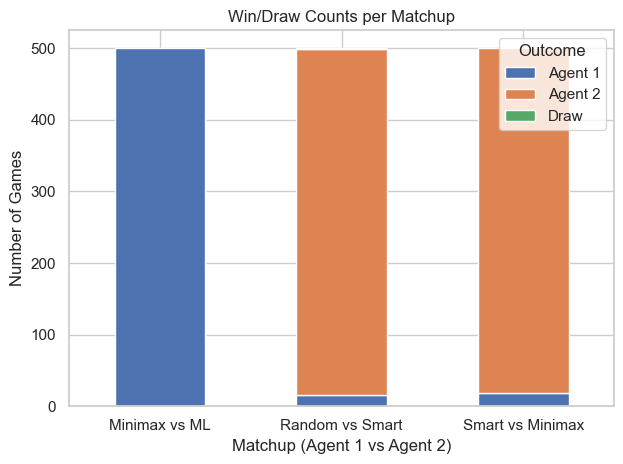

In [11]:
# Wins per matchup - bar chart

# Create new column for the labels
df["matchup_label"] = df["matchup"].map(matchup_labels)

win_counts[["agent1", "agent2", "draw"]].plot(kind="bar", stacked=True)

# Colour keys
plt.legend(title="Outcome", labels=["Agent 1", "Agent 2", "Draw"], loc="upper right")

plt.xticks(ticks=range(len(win_counts)), labels=win_counts.index.map(matchup_labels), rotation=0)
plt.title("Win/Draw Counts per Matchup")
plt.ylabel("Number of Games")
plt.xlabel("Matchup (Agent 1 vs Agent 2)")
plt.tight_layout()
plt.show()

## Distribution of Win Types

This pie chart shows how games were won across all matchups—horizontally, vertically, or diagonally.  
It helps identify whether certain agents tend to favour specific win strategies.

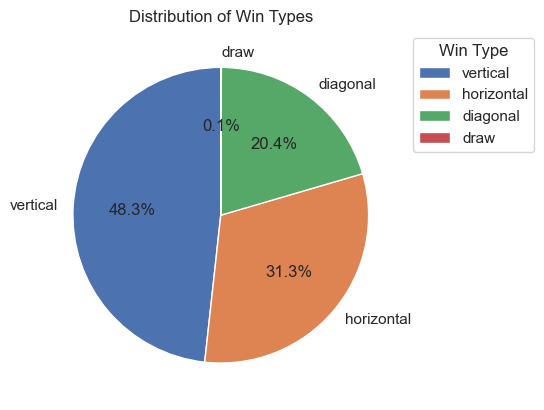

In [13]:
# Pie chart
win_type_counts = df["win_type"].value_counts()
win_type_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)

# Colour keys
plt.legend(
    labels=win_type_counts.index, 
    title="Win Type",
    loc="upper left", 
    bbox_to_anchor=(1, 1) # place outside chart
)

plt.title("Distribution of Win Types")
plt.ylabel("")
plt.show()

## Minimax Search Performance

These charts evaluate how the Minimax agent performs in terms of:
- Nodes expanded per game
- Search depth used
- Branching factor during decision-making
- Heuristic score improvement after making a move

Only matchups involving the Minimax agent are included.

> **Note:** Thin black lines above the bars represent 95% confidence intervals (error bars), indicating variability across 500 games.

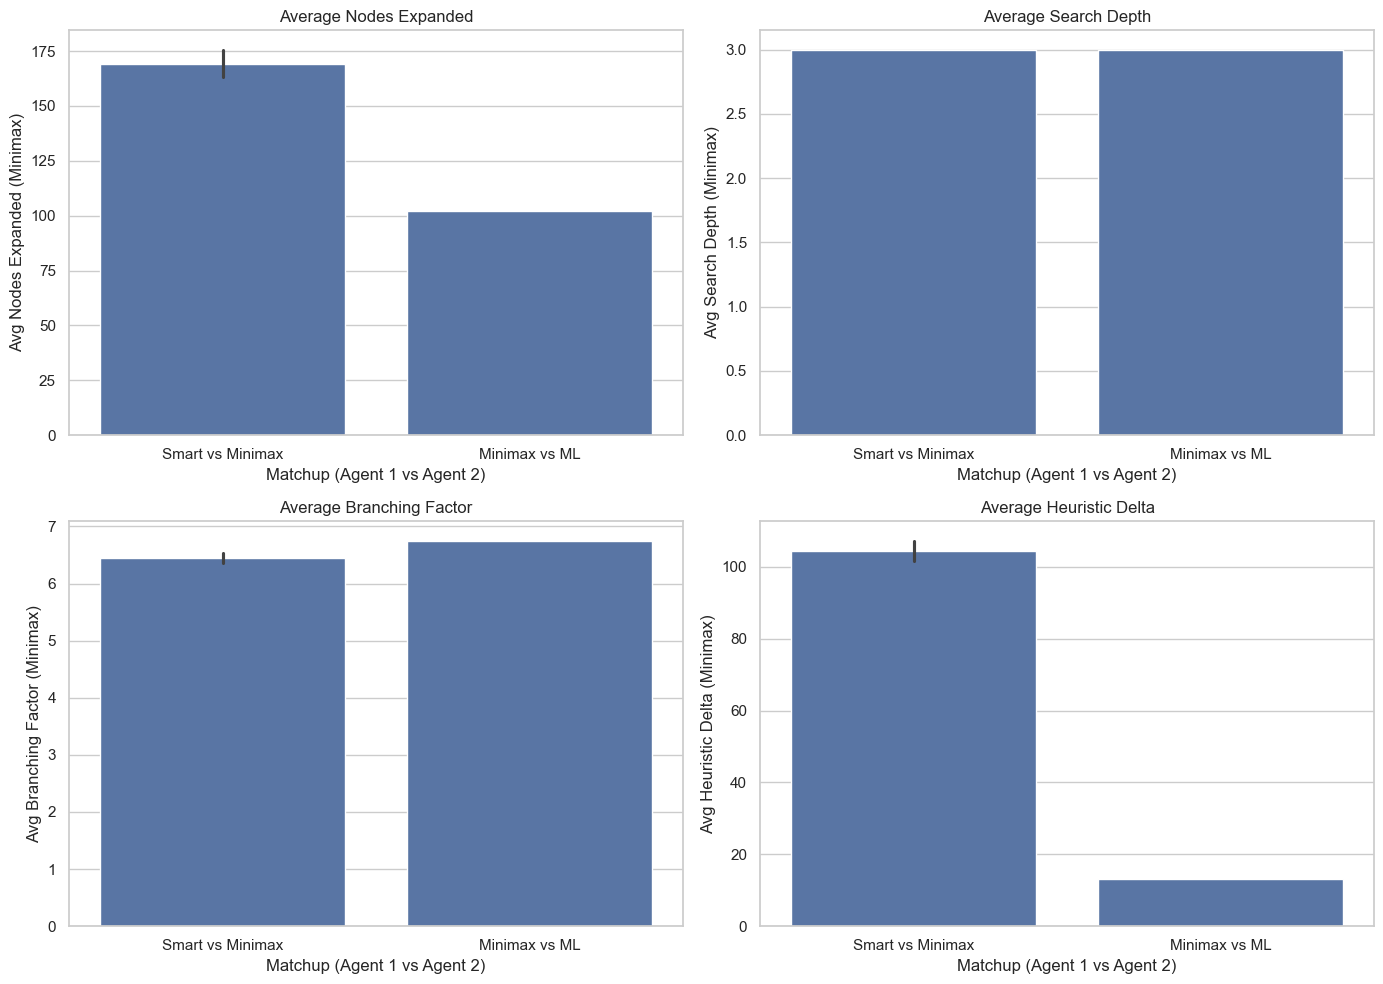

In [15]:
# Search performance

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_bar(minimax_games, "matchup_label", "minimax_nodes",
         title="Average Nodes Expanded", ylabel="Avg Nodes Expanded (Minimax)", ax=axes[0, 0])

plot_bar(minimax_games, "matchup_label", "minimax_depth",
         title="Average Search Depth", ylabel="Avg Search Depth (Minimax)", ax=axes[0, 1])

plot_bar(minimax_games, "matchup_label", "avg_branching_factor",
         title="Average Branching Factor", ylabel="Avg Branching Factor (Minimax)", ax=axes[1, 0])

plot_bar(minimax_games, "matchup_label", "avg_heuristic_delta",
         title="Average Heuristic Delta", ylabel="Avg Heuristic Delta (Minimax)", ax=axes[1, 1])

plt.tight_layout()
plt.show()

## Efficiency Metrics: Execution Time and Memory Usage

These charts show the average time per move (in seconds) and average memory usage (in MB) for each agent, grouped by matchup.  
They highlight how computationally demanding different agents are during gameplay.

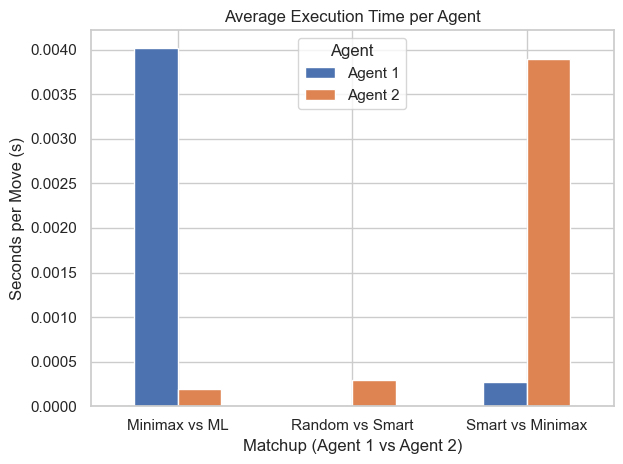

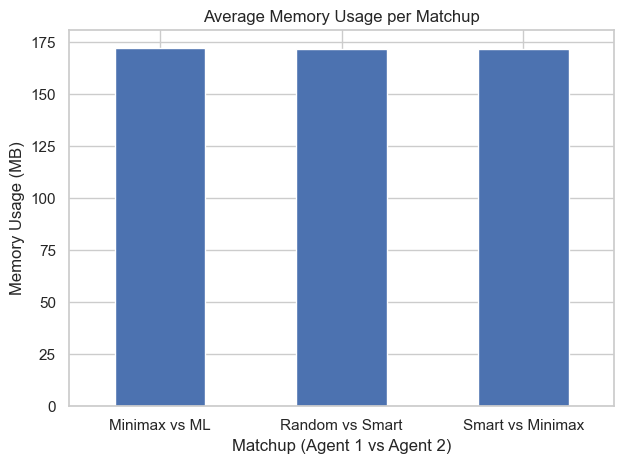

In [17]:
# Execution time & memory usage

df_grouped[["avg_time_agent1", "avg_time_agent2"]].plot(kind="bar")
plt.legend(title="Agent", labels=["Agent 1", "Agent 2"])
plt.title("Average Execution Time per Agent")
plt.ylabel("Seconds per Move (s)")
plt.xlabel("Matchup (Agent 1 vs Agent 2)")
plt.xticks(rotation=0) # keep x-axis labels horizontal
plt.tight_layout()
plt.show()

df_grouped["memory_mb"].plot(kind="bar", title="Average Memory Usage per Matchup", ylabel="Memory Usage (MB)")
plt.xticks(rotation=0)
plt.xlabel("Matchup (Agent 1 vs Agent 2)")
plt.tight_layout()
plt.show()

## Summary of Key Performance Metrics

This table presents the average values of all recorded metrics across matchups, including:
- Number of moves
- Execution time
- Memory usage
- Minimax-specific metrics (search depth, nodes expanded, heuristic delta)

“N/A” values indicate metrics that do not apply to agents that did not use minimax.

In [34]:
# Export summary table

# Make headers user-friendly
df_grouped = df_grouped.rename(columns={
    "moves": "Average Moves per Game",
    "minimax_nodes": "Avg Nodes Expanded (Minimax)",
    "minimax_depth": "Avg Search Depth (Minimax)",
    "avg_time_agent1": "Avg Time per Move - Agent 1 (s)",
    "avg_time_agent2": "Avg Time per Move - Agent 2 (s)",
    "memory_mb": "Avg Memory Usage (MB)",
    "avg_branching_factor": "Avg Branching Factor (Minimax)",
    "avg_heuristic_delta": "Avg Heuristic Delta (Minimax)"
})

for col in df_grouped.columns:
    if df_grouped[col].isnull().any():
        df_grouped[col] = df_grouped[col].astype("object")

df_grouped.fillna("N/A", inplace=True)

df_grouped.index.name = "Matchup"
df_grouped.round(3).to_csv("summary_metrics.csv")